In [1]:
# import EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset
ulam_df = pd.read_csv('./data_collection/ulam.csv', sep=',', index_col=0)
print('ulam_df.shape: {}'.format(ulam_df.shape))

ulam_df.shape: (91, 2)


In [3]:
# check dataframe info
ulam_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ulam_titles  91 non-null     object
 1   ingredients  91 non-null     object
dtypes: object(2)
memory usage: 2.1+ KB


In [4]:
# check few random sample
ulam_df.sample(30)

,ulam_titles,ingredients
13,Maja blanca,"['COCONUT MILK', 'CORNSTARCH', 'CORN', 'CHEESE..."
4,Tokneneng,"['EGGS', 'ANNATTO POWDER', 'FLOUR', 'SALT', 'B..."
31,Maruya,"['BANANAS', 'EGGS', 'FLOUR', 'BAKING POWDER']"
5,Bukayo,"['COCONUT', 'SUGAR']"
80,Leche Flan,"['EGGS', 'MILK', 'CONDENSED MILK', 'SUGAR', 'V..."
42,Champorado,"['RICE', 'COCOA BEANS', 'SUGAR', 'CONDENSED MI..."
50,Batchoy,"['NOODLES', 'STOCK', 'PORK', 'BONE MARROW', 'O..."
44,Gulaman,"['GELATIN', 'VANILLA', 'CONDENSED MILK']"
37,Bopis,"['OFFAL', 'VINEGAR', 'FISH SAUCE', 'GARLIC', '..."
21,Latik,"['COCONUT MILK', 'COCONUT CREAM', 'SUGAR']"


In [5]:
# compute basic ulam_titles descriptive stats
ulam_df['ulam_titles'].describe()

count         91
unique        91
top       Bulalô
freq           1
Name: ulam_titles, dtype: object

In [6]:
# remove the "OR\n" to some ingredients and convert the ingredients 
# list to a single string where each ingredient are separated by the symbol '|'
def remove_or_slash_n(ingredients):
    ingredients = ingredients.lstrip('[').rstrip(']').replace('\'', '').split(',')
    ingredients_cleaned = [ingredient.split(r'OR\n')[-1].lower().strip() for ingredient in list(ingredients)]
    return '|'.join(ingredients_cleaned)
ulam_df['ingredients'] = ulam_df['ingredients'].apply(remove_or_slash_n)

In [7]:
# check few random sample
ulam_df.sample(30)

,ulam_titles,ingredients
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs
45,Lugaw,rice|chicken|fish sauce|ginger|garlic|scallion...
29,Espasol,rice flour|coconut|coconut milk
72,Tocino,pork|sugar|salt|rice wine|soy sauce|pineapple ...
43,Bilo-bilo,rice flour|coconut milk|sweet potato|tapioca|d...
7,Lauya,chicken|pork|beef|cabbage|carrot|potatoes|garl...
67,Inasal na manok,chicken|vinegar|lemongrass|garlic|ginger
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...
21,Latik,coconut milk|coconut cream|sugar


In [8]:
# compute total ingredients per dish (ulam)
ulam_df['num_ingredients'] = ulam_df['ingredients'].apply(lambda ing: len(ing.split('|')))
ulam_df.sort_values(by='num_ingredients', ascending=False)

,ulam_titles,ingredients,num_ingredients
20,Pochero,beef|pork|chicken|tomato|onion|garlic|fish sau...,15
85,Kare-kare,pork|oxtail|chicken|goat|peanut butter|peanuts...,14
50,Batchoy,noodles|stock|pork|bone marrow|offal|eggs|chic...,13
56,Pinakbet,pork|shrimp paste|pumpkin|sweet potato|eggplan...,13
17,Giniling,beef|bell pepper|olive oil|garlic|onion|olives...,12
...,...,...,...
12,Banana Cue,bananas|sugar,2
46,Proben,offal|cornstarch,2
5,Bukayo,coconut|sugar,2
24,Tortang talong,eggplant|eggs,2


In [9]:
# drop Lumpia record as its ingredient is a Lumpia variant
ulam_df.drop([86], inplace=True)

Text(0.5, 0, 'num_ingredients')

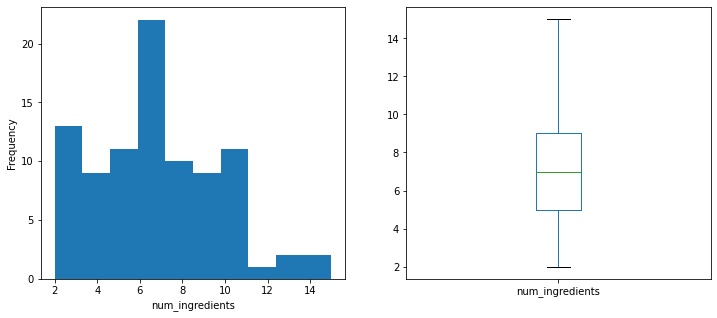

In [10]:
# view distribution of num_ingredients
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ulam_df['num_ingredients'].plot(kind='hist', ax=axes[0])
ulam_df['num_ingredients'].plot(kind='box', ax=axes[1], xlabel='')
axes[0].set_xlabel('num_ingredients')

In [11]:
# compute basic descriptive stats for number of ingredients
ulam_df['num_ingredients'].describe()

count    90.000000
mean      6.811111
std       2.948603
min       2.000000
25%       5.000000
50%       7.000000
75%       9.000000
max      15.000000
Name: num_ingredients, dtype: float64

In [12]:
# represent ingredients data as bag-of-words
from sklearn.feature_extraction.text import CountVectorizer 
import pprint

cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
pprint.pprint(cv.get_feature_names())

Vocabulary size: 130
['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'pancit batil patong',
 'pancit bihon',
 'pa

In [13]:
# look for ulam (dish) that has pancit in its title
mask = ulam_df['ulam_titles'].apply(lambda ulam: 'pancit' in ulam.lower())
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
34,Pancit lomi,noodles|chicken|pork|offal|cabbage|carrot|eggs,7
36,Pancit malabon,noodles|pork|shrimps|fish sauce|cabbage|chicha...,9
47,Pancit bihon,pork|chicken|noodles|soy sauce|green beans|carrot,6
52,Pancit palabok,noodles|shrimps|fish sauce|eggs|chicharrón|sca...,8
77,Pancit canton,noodles|pork|beef|seafood|soy sauce|carrot|oni...,9
90,Pancit,pancit canton|pancit bihon|pancit palabok|panc...,8


In [14]:
# drop Pancit record as its ingredients are Pancit variants
ulam_df.drop([90], inplace=True)

In [15]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
pprint.pprint(cv.get_feature_names())

Vocabulary size: 122
['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'pe

In [16]:
mask = ulam_df['ingredients'].apply(lambda ings: 'tapa (philippines)' in ings.split('|'))
ulam_df[mask]

,ulam_titles,ingredients,num_ingredients
49,Tapsilog,tapa (philippines)|eggs|rice|garlic,4
78,Silog,rice|eggs|garlic|tapa (philippines)|hot dog|to...,9


In [17]:
# drop Pancit record as its ingredients are Pancit variants
ulam_df.drop([49], inplace=True)

In [18]:
# represent ingredients data as bag-of-words
cv = CountVectorizer(analyzer=lambda text: text.split('|')).fit(ulam_df['ingredients'])
print("Vocabulary size: {}".format(len(cv.vocabulary_)))
pprint.pprint(cv.get_feature_names())

Vocabulary size: 122
['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'pe

In [19]:
bow = cv.transform(ulam_df['ingredients'])
bow_df = pd.DataFrame(bow.toarray(), columns=cv.get_feature_names(), index=ulam_df['ulam_titles'])
bow_df.head()

,annatto powder,baking powder,banana ketchup,bananas,bangus,bay leaf,beef,bell pepper,bitter melon,black pepper,...,tocino,tofu,tomato,tomato sauce,tuna,vanilla,vinegar,water spinach,white wine vinegar,yam
ulam_titles,,,,,,,,,,,,,,,,,,,,,
Adobong manok,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Talunan,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
Kilawin,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Filipino Spaghetti,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tokneneng,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(bow)
tfidf_matrix = tfidf.transform(bow)
print('tfidf_matrix.shape: {}'.format(tfidf_matrix.shape))

tfidf_matrix.shape: (88, 122)


In [22]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('cosine_sim.shape: {}'.format(cosine_sim.shape))

cosine_sim.shape: (88, 88)


In [24]:
# Build a 1-dimensional array with ulam titles
titles = ulam_df['ulam_titles']
indices = pd.Series(ulam_df.index, index=ulam_df['ulam_titles'])

In [60]:
# Function that get ulam recommendations based on the cosine similarity score of ulam ingredients
def ulam_recommendations(ulam):
    idx = indices[ulam]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    ulam_indices = [i[0] for i in sim_scores]
    return titles.iloc[ulam_indices], ulam_df['ingredients'].iloc[ulam_indices]

In [109]:
def get_ulam_recommendations(ingredients):
    ingredients_bow = cv.transform([ingredients])
    ingredients_tfidf = tfidf.transform(ingredients_bow)
    cosine_sim_ingredients = cosine_similarity(tfidf_matrix, ingredients_tfidf)
    sim_scores = list(enumerate(cosine_sim_ingredients[:]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[0:10]
    print(sim_scores)
    ulam_indices = [i[0] for i in sim_scores if i[1] > 0.50]
    return titles.iloc[ulam_indices], ulam_df['ingredients'].iloc[ulam_indices]

In [110]:
my_available_ingredients = 'chicken|lime|soy sauce|garlic|sugar'
get_ulam_recommendations(my_available_ingredients)

[(80, array([0.90634001])), (9, array([0.74682919])), (10, array([0.6008892])), (16, array([0.36727822])), (59, array([0.36120758])), (18, array([0.32385411])), (85, array([0.29773994])), (67, array([0.24182922])), (71, array([0.23459938])), (41, array([0.23446202]))]


(81    Tapa (Philippines)
 9       Inihaw na liempo
 10        Bistek Tagalog
 Name: ulam_titles, dtype: object,
 81                     beef|lime|soy sauce|garlic|sugar
 9          pork|soy sauce|lime|salt|black pepper|garlic
 10    beef|lime|lemon|onion|garlic|soy sauce|black p...
 Name: ingredients, dtype: object)

In [91]:
cv.get_feature_names()

['annatto powder',
 'baking powder',
 'banana ketchup',
 'bananas',
 'bangus',
 'bay leaf',
 'beef',
 'bell pepper',
 'bitter melon',
 'black pepper',
 'bok choy',
 'bone marrow',
 'brown sugar',
 'butter',
 'cabbage',
 'capers',
 'carrot',
 'cashews',
 'cassava',
 'cayenne pepper',
 'cheese',
 'chicharrón',
 'chicken',
 'chickpeas',
 'citrus fruit',
 'cocoa beans',
 'coconut',
 'coconut cream',
 'coconut milk',
 'condensed milk',
 'coriander',
 'corn',
 'cornstarch',
 'cream',
 'cream of tartar',
 'cumin',
 'daikon radish',
 'durian',
 'eggplant',
 'eggs',
 'fish sauce',
 'flour',
 'garlic',
 'gelatin',
 'ginger',
 'goat',
 'green beans',
 'guava',
 'hot dog',
 'hot peppers',
 'ice cream',
 'ketchup',
 'latik',
 'leche flan',
 'leek',
 'lemon',
 'lemongrass',
 'lime',
 'long beans',
 'lye water',
 'milk',
 'mung bean',
 'noodles',
 'offal',
 'oil',
 'okra',
 'olive oil',
 'olives',
 'onion',
 'orange juice',
 'oxtail',
 'papaya',
 'peanut butter',
 'peanuts',
 'peppercorns',
 'pickled